In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
inp0 = pd.read_csv("application_data.csv")

In [5]:
inp1 = pd.read_csv("columns_description.csv", sep=",", encoding='cp1252')

In [6]:
inp2=pd.read_csv("previous_application.csv")
inp2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


SK_ID_CURR is common in both application csv and the previous applicantion csv


Data Cleaning


In [9]:
inp2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [10]:
percent_missing = inp2.isnull().sum()*100/len(inp2) 
percent_missing.sort_values(ascending=False).head(10)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
dtype: float64

Removing missing >40%

In [11]:
inp2=inp2.drop(["RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY","AMT_DOWN_PAYMENT","RATE_DOWN_PAYMENT","NAME_TYPE_SUITE"],axis=1)

In [12]:
inp2.shape

(1670214, 32)

In [13]:
percent_missing = inp2.isnull().sum()*100/len(inp2) 
percent_missing.sort_values()

SK_ID_PREV                      0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
CODE_REJECT_REASON              0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
SK_ID_CURR                      0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TYPE              0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_CREDIT                      0.000060
PRODUCT_COMBINATION             0.020716
CNT_PAYMENT                    22.286366
AMT_ANNUITY     

In [14]:
inp2.AMT_CREDIT.isnull().sum()

1

In [15]:
inp2.PRODUCT_COMBINATION.isnull().sum()/len(inp2.PRODUCT_COMBINATION)

0.0002071590826085759

Since the missing values in AMT_CREDIT and PRODUCT_COMBINATION are low we can just drop the missing values

In [16]:
inp2.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], inplace=True)

In [17]:
inp2.AMT_CREDIT.isnull().sum()

0

In [18]:
inp2.PRODUCT_COMBINATION.isnull().sum()

0

In [19]:
inp2.NFLAG_INSURED_ON_APPROVAL.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    NaN
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [20]:
inp1.drop('Unnamed: 0',axis=1, inplace= True)

In [21]:
inp2[inp2.NAME_CASH_LOAN_PURPOSE=="XAP"]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
13,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,53779.5,SUNDAY,15,Y,...,Consumer electronics,8.0,low_action,POS household without interest,365243.0,-378.0,-168.0,-168.0,-163.0,1.0
14,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,26550.0,SATURDAY,10,Y,...,Consumer electronics,3.0,middle,POS household with interest,365243.0,-693.0,-633.0,-633.0,-627.0,0.0
15,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,126490.5,TUESDAY,7,Y,...,Industry,6.0,low_normal,POS other with interest,365243.0,-668.0,-518.0,-518.0,-512.0,0.0
16,2163253,154602,Consumer loans,4187.340,26955.0,27297.0,26955.0,SATURDAY,12,Y,...,Consumer electronics,8.0,high,POS household with interest,365243.0,-1440.0,-1230.0,-1230.0,-1226.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670202,2205099,157707,Consumer loans,4334.355,22207.5,23854.5,22207.5,THURSDAY,10,Y,...,Clothing,6.0,middle,POS industry with interest,365243.0,-948.0,-798.0,-858.0,-850.0,0.0
1670203,2844282,383898,Consumer loans,NaN,14791.5,14791.5,14791.5,TUESDAY,13,Y,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0


In [22]:
inp2=inp2[~(inp2.NAME_CASH_LOAN_PURPOSE=="XAP")]

In [23]:
inp2.NAME_CASH_LOAN_PURPOSE.describe()

count     747553
unique        24
top          XNA
freq      677918
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [24]:
inp2=inp2[~(inp2.NAME_CASH_LOAN_PURPOSE=="XNA")]

In [25]:
inp2.NAME_CASH_LOAN_PURPOSE.describe()

count       69635
unique         23
top       Repairs
freq        23765
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [26]:
merged_dsets = pd.merge(inp0[['SK_ID_CURR', 'TARGET']], inp2, how='left', on=['SK_ID_CURR'])

merged_dsets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331007 entries, 0 to 331006
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   331007 non-null  int64  
 1   TARGET                       331007 non-null  int64  
 2   SK_ID_PREV                   59413 non-null   float64
 3   NAME_CONTRACT_TYPE           59413 non-null   object 
 4   AMT_ANNUITY                  59179 non-null   float64
 5   AMT_APPLICATION              59413 non-null   float64
 6   AMT_CREDIT                   59413 non-null   float64
 7   AMT_GOODS_PRICE              59413 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   59413 non-null   object 
 9   HOUR_APPR_PROCESS_START      59413 non-null   float64
 10  FLAG_LAST_APPL_PER_CONTRACT  59413 non-null   object 
 11  NFLAG_LAST_APPL_IN_DAY       59413 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       59413 non-null   object 
 13 

In [42]:
target_m_1=merged_dsets[merged_dsets.TARGET==1]
target_m_0=merged_dsets[merged_dsets.TARGET==0]

In [27]:
merged_dsets.NAME_CASH_LOAN_PURPOSE.describe()

count       59413
unique         23
top       Repairs
freq        20117
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

Handling Outliers

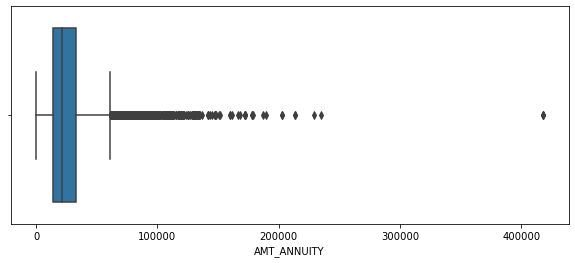

In [28]:
plt.figure(figsize=[10,4])
sns.boxplot(merged_dsets['AMT_ANNUITY'])
plt.show()

In [29]:
merged_dsets[merged_dsets['AMT_ANNUITY']>400000]

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
128983,238970,0,2501351.0,Cash loans,418058.145,2250000.0,2369070.0,2250000.0,FRIDAY,11.0,...,XNA,6.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
211374,327696,0,1314599.0,Cash loans,417927.645,2250000.0,2369070.0,2250000.0,TUESDAY,18.0,...,XNA,6.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
246412,365299,0,1225459.0,Cash loans,418058.145,2250000.0,2369070.0,2250000.0,MONDAY,10.0,...,XNA,6.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


Dropping these outliers

In [30]:
merged_dsets=merged_dsets[~(merged_dsets['AMT_ANNUITY']>400000)]

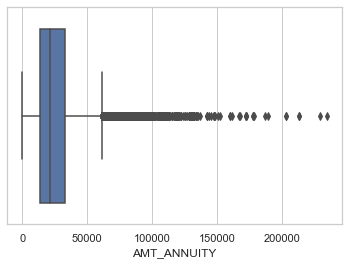

In [31]:
sns.set(style="whitegrid")
sns.boxplot(merged_dsets['AMT_ANNUITY'])
plt.show()

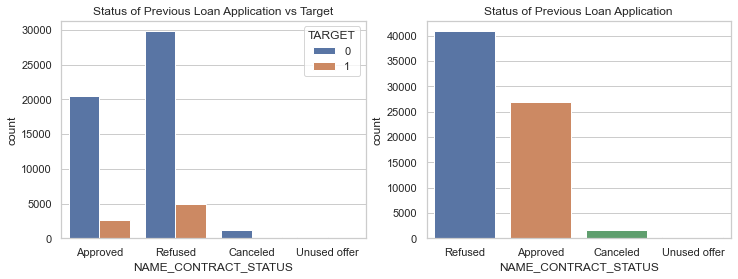

In [32]:

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.title("Status of Previous Loan Application vs Target")
sns.countplot(merged_dsets['NAME_CONTRACT_STATUS'], hue=merged_dsets['TARGET'])
plt.subplot(1,2,2)
plt.title("Status of Previous Loan Application")
sns.countplot(inp2['NAME_CONTRACT_STATUS'])
plt.show()

Contarct status vs Default rate

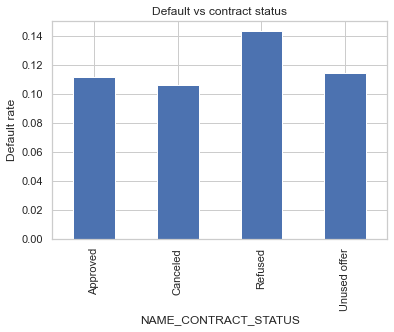

In [36]:
plt.title("Default vs contract status")
plt.ylabel("Default rate")
merged_dsets.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].mean().plot.bar()
plt.show()

Comment:
1) out of around 25000 previous approved applications ,around 20000 i.e 90% are non-defaulters on the current loan and about 10% are defaulters this proves that people with previous approved applications have low chance of defaulting

2) Applicants refused in the previous application have the highest default rate

In [33]:
merged_dsets.CNT_PAYMENT.median()

24.0

Replacing missing values in CNT_PAYEMENT with the median

In [34]:
 merged_dsets=merged_dsets.fillna(merged_dsets.median())

In [35]:
merged_dsets.CNT_PAYMENT.isnull().sum()

0

<AxesSubplot:>

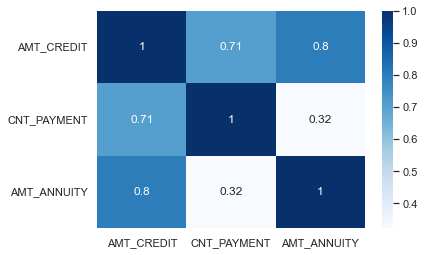

In [36]:
sns.heatmap(merged_dsets[["AMT_CREDIT","CNT_PAYMENT","AMT_ANNUITY"]].corr(),annot=True,cmap="Blues")

There is a high correlation between AMT_CREDIT and AMT_ANNUITY as well as CNT_PAYEMENT and AMT_CREDIT 

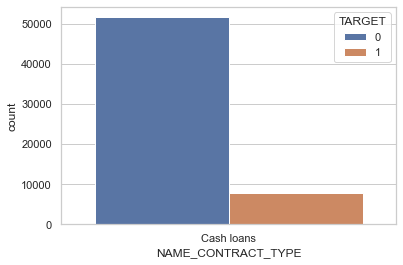

In [37]:
sns.countplot(merged_dsets.NAME_CONTRACT_TYPE, hue=merged_dsets.TARGET)
plt.show()

In [38]:
merged_dsets['CODE_REJECT_REASON'].value_counts()

XAP       24444
HC        18510
LIMIT      7972
SCO        4602
VERIF      2054
SCOFR      1221
XNA         423
CLIENT      183
SYSTEM        1
Name: CODE_REJECT_REASON, dtype: int64

In [39]:
merged_dsets=merged_dsets[~(merged_dsets['CODE_REJECT_REASON']=="XNA")]

Conclusion: All of the loans in the previous application are Cash loans out of which around 10000 were defaulters in the current application

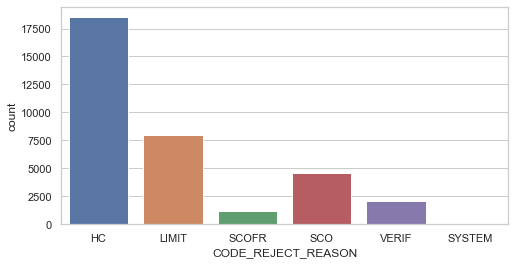

In [40]:
plt.figure(figsize=[8,4])
sns.countplot(merged_dsets[merged_dsets['NAME_CONTRACT_STATUS'] == "Refused"]["CODE_REJECT_REASON"])
plt.show()

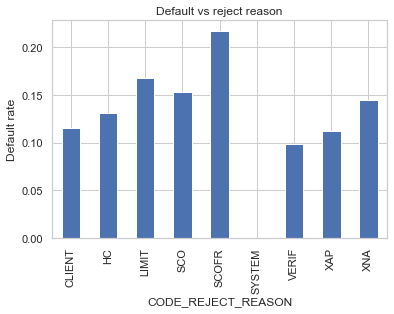

In [38]:
plt.title("Default vs reject reason")
plt.ylabel("Default rate")
merged_dsets.groupby(['CODE_REJECT_REASON'])['TARGET'].mean().plot.bar()
plt.show()

Comment: Applicants refused due to scofr have the highest default rate

In [41]:
merged_dsets=merged_dsets[~(merged_dsets['NAME_CLIENT_TYPE']=="XNA")]
inp2=inp2[~(inp2['NAME_CLIENT_TYPE']=="XNA")]

We can see that HC , limit and SCO are the top reasons for rejection

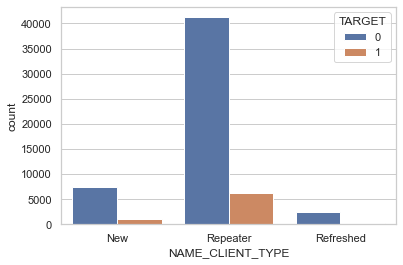

In [42]:
sns.countplot(merged_dsets['NAME_CLIENT_TYPE'], hue=merged_dsets['TARGET'])
plt.show()

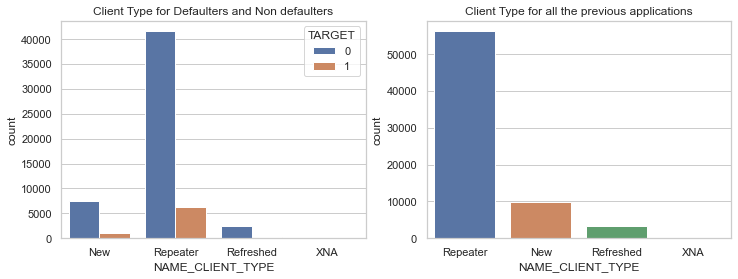

In [41]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.title("Client Type for Defaulters and Non defaulters")
sns.countplot(merged_dsets['NAME_CLIENT_TYPE'], hue=merged_dsets['TARGET'])
plt.subplot(1,2,2)
plt.title("Client Type for all the previous applications")
sns.countplot(inp2['NAME_CLIENT_TYPE'])
plt.show()

Almost 70% of the old clients Repeaters are non defaulters while 50% of the New cleints are non defaulters

In [43]:
total_approved = merged_dsets[merged_dsets['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
default_approved = merged_dsets[(merged_dsets['TARGET'] == 1) & (merged_dsets[merged_dsets.TARGET==1]['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print("Percentage of previously approved loan applicants that defaulted in current loan : ", (default_approved*100/total_approved))

Percentage of previously approved loan applicants that defaulted in current loan :  11.198266522210185


In [44]:

total_refused = merged_dsets[merged_dsets['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
nondefault_refused = merged_dsets[(merged_dsets['TARGET'] == 0) & (merged_dsets['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print("Percentage of previously refused loan applicants that were able to pay current loan : ", (nondefault_refused*100/total_refused))

Percentage of previously refused loan applicants that were able to pay current loan :  85.65966132881005


Client type  vs  target vs reject reason

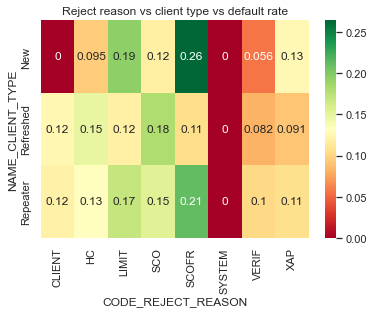

In [49]:
resp=pd.pivot_table(data=merged_dsets,index="NAME_CLIENT_TYPE",columns="CODE_REJECT_REASON",values="TARGET",fill_value=0)
plt.title("Reject reason vs client type vs default rate")
sns.heatmap(resp,annot=True,cmap="RdYlGn")
plt.show()

Comment: new clients with scofr rejection readon have the highest default rate

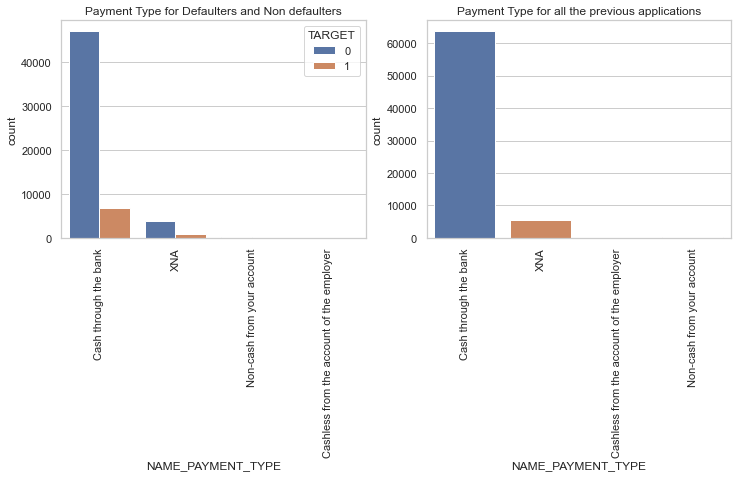

In [152]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Payment Type for Defaulters and Non defaulters")
sns.countplot(merged_dsets['NAME_PAYMENT_TYPE'], hue=merged_dsets['TARGET'])
plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title("Payment Type for all the previous applications")
sns.countplot(inp2['NAME_PAYMENT_TYPE'])
plt.show()

Most of the payment is done by cash through the bank

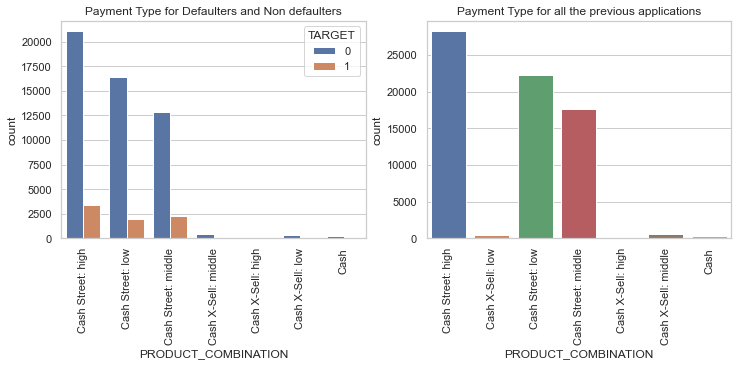

In [164]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Payment Type for Defaulters and Non defaulters")
sns.countplot(merged_dsets['PRODUCT_COMBINATION'], hue=merged_dsets['TARGET'])
plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title("Payment Type for all the previous applications")
sns.countplot(inp2['PRODUCT_COMBINATION'])
plt.show()

The highest number of defaulters is for Cash Streets high ,low and middle

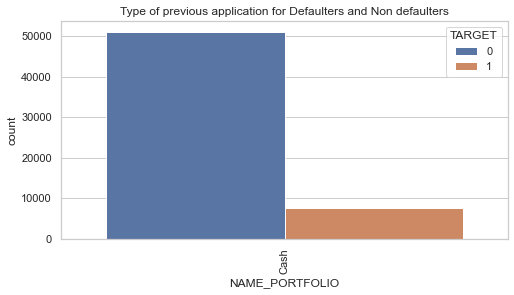

In [46]:
plt.figure(figsize=[8,4])

plt.xticks(rotation=90)
plt.title("Type of previous application for Defaulters and Non defaulters")
sns.countplot(merged_dsets['NAME_PORTFOLIO'], hue=merged_dsets['TARGET'])

plt.show()